In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv('Crop_rec2.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78,42.0,NaN,NaN,81.604873,7.628473,262.717340,rice


In [4]:
# Data preprocessing

In [5]:
# KNN IMPUTATION
import pandas as pd
import numpy as np
from sklearn. impute import KNNImputer

data = pd.read_csv('crop_rec2.csv')

np.random. seed(0)
data_with_missing = data.mask(np.random.random(data.shape) < 0.05)

numerical_columns = data_with_missing.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data_with_missing.select_dtypes(exclude=[np.number]).columns.tolist()

if 'label' in numerical_columns:
 numerical_columns.remove('label')
if 'label' not in categorical_columns:
 categorical_columns.append('label')

imputer = KNNImputer(n_neighbors=5)
imputed_numerical_data = imputer.fit_transform(data_with_missing[numerical_columns])
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_columns)

imputed_df = pd.concat([imputed_numerical_df, data_with_missing[categorical_columns].reset_index(drop=True)], axis=1)

missing_values_after = imputed_df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)

imputed_df.to_csv('Crop_recommendation_imputed.csv', index=False)


Missing values after imputation:
N               0
P               0
K               0
temperature     0
humidity        0
ph              0
rainfall        0
label          98
dtype: int64


In [25]:
# OUTLIER TREATEMENT ON RAINFALL

import pandas as pd
import numpy as np

data = pd.read_csv('crop_rec2.csv')



mean_value = np.mean(data['rainfall'])
std_value = np.std(data['rainfall'])

threshold = 3 * std_value

data_trimmed = data[(data['rainfall'] >= mean_value - threshold) &
(data['rainfall'] <= mean_value + threshold)]

print("\nTrimmed data (without outliers):")
print(data_trimmed.head())


Trimmed data (without outliers):
    N     P     K  temperature   humidity        ph    rainfall label
0  90  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3  74  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78  42.0   NaN          NaN  81.604873  7.628473  262.717340  rice


In [7]:
# STANDARDIZE
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("crop_rec2.csv")

print("Original data:")
print(data.head())

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data[['rainfall']])
data['rainfall'] = data_scaled

print("\nStandardized data:")
print(data.head())

Original data:
    N     P     K  temperature   humidity        ph    rainfall label
0  90  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3  74  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78  42.0   NaN          NaN  81.604873  7.628473  262.717340  rice

Standardized data:
    N     P     K  temperature   humidity        ph  rainfall label
0  90  42.0  43.0    20.879744  82.002744  6.502985  1.845187  rice
1  85  58.0  41.0    21.770462  80.319644  7.038096  2.282456  rice
2  60  55.0  44.0    23.004459  82.320763  7.840207  2.970227  rice
3  74  35.0  40.0    26.491096  80.158363  6.980401  2.581253  rice
4  78  42.0   NaN          NaN  81.604873  7.628473  2.947241  rice


In [26]:
df1 = pd.read_csv('Crop_recommendation_imputed1.csv')

In [27]:
df1.info()
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph   

In [28]:
if df1['N'].all()>90:
    print(df1['N'])
    

In [29]:
df1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [30]:
x = df1.drop('label', axis = 1)
y = df1['label']

In [31]:
#MODEL TRAINING

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1,test_size=0.2)# random state is 1 so that acc not chnge every time

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1220 to 1405
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 2065 to 688
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            440 non-null    int64  
 1   P            440 non-null    int64  
 2   K            440 non-null    int64  
 3   temperature  440 non-null    float64
 4   humidity     440 non-null    float64
 5   ph           440 non-null    float64
 6   rainfall     440 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [35]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1760 entries, 1220 to 1405
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1760 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


In [36]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9636363636363636


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# DECISSION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.990909090909091


In [40]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators = 25, random_state=2)
model_4.fit(x_train.values, y_train.values)
y_pred_4 = model_4.predict(x_test)
random_fore_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy of Random Forest is " + str(random_fore_acc))


Accuracy of Random Forest is 0.9931818181818182


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import joblib 

In [ ]:
file_name = 'crop_app1'

In [ ]:
joblib.dump(model_4,'crop_app1')

In [ ]:
app = joblib.load('crop_app1')

In [ ]:
arr = [[40,45,36,24.6,43,6.89,145.98]]
acc = app.predict(arr)

In [ ]:
acc

In [ ]:
print("The best crop to cultivate in this condition is: " 
      +acc)

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_4, file)

In [ ]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

In [ ]:
# DATA VISUALISATION 


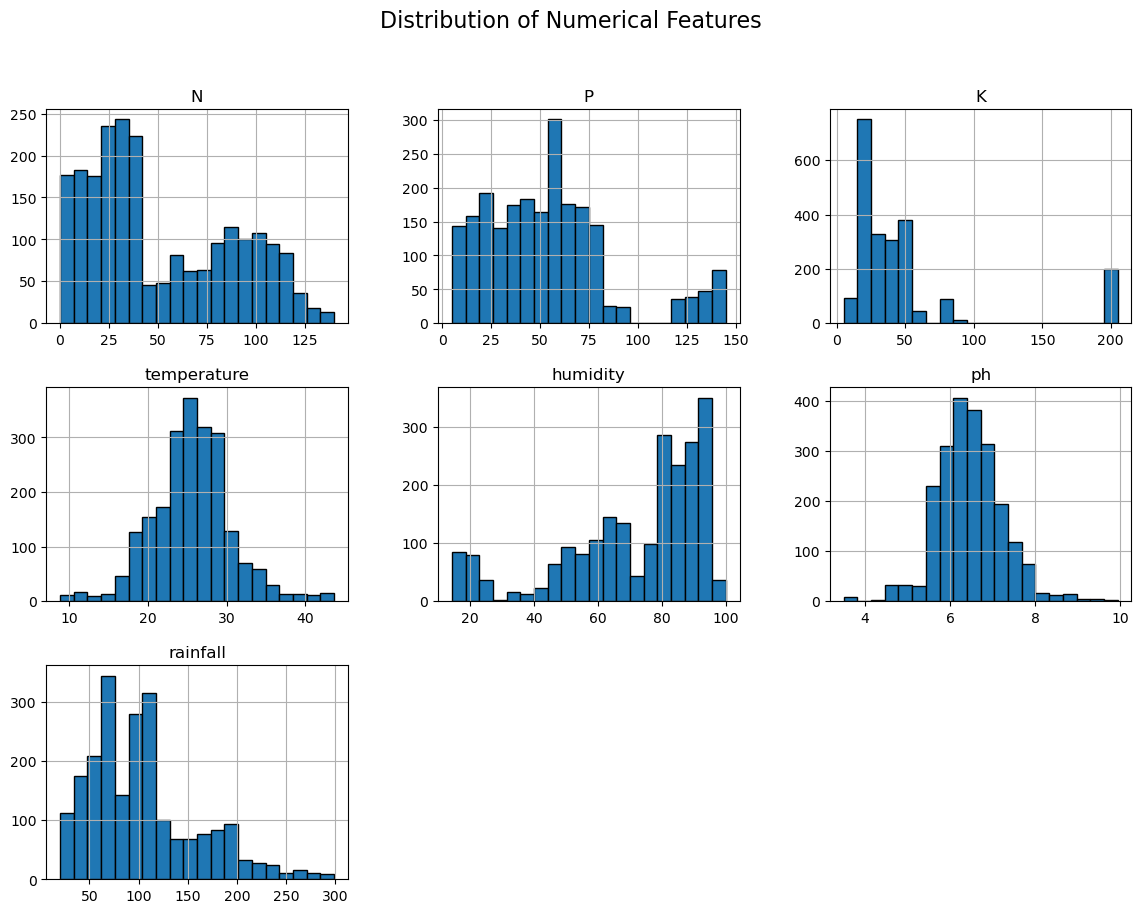

In [22]:
# DISTRIBUTION OF NUMERICAL FEATURES 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('crop_recommendation.csv')

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

data[numerical_features].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', size=16)
plt.show()

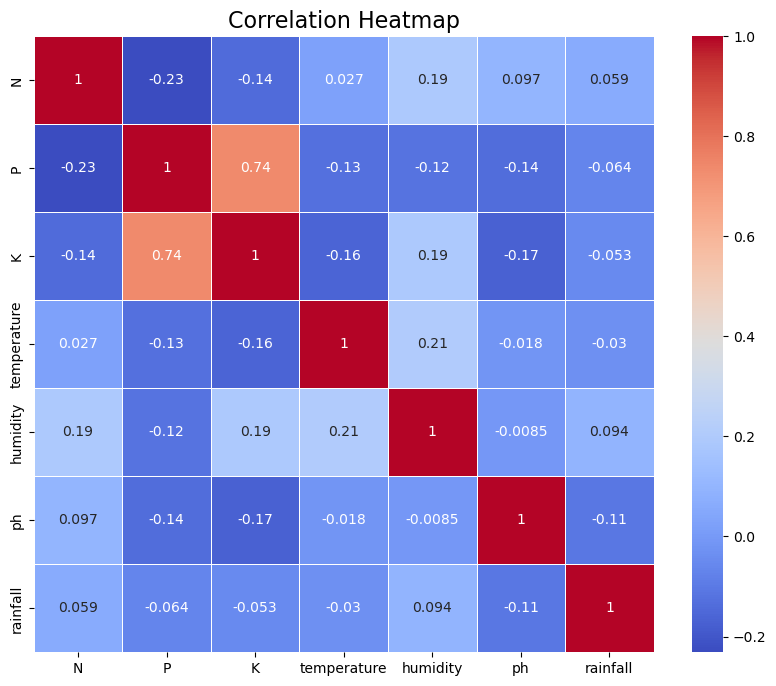

In [23]:
# CORRELATION HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', size=16)
plt.show()

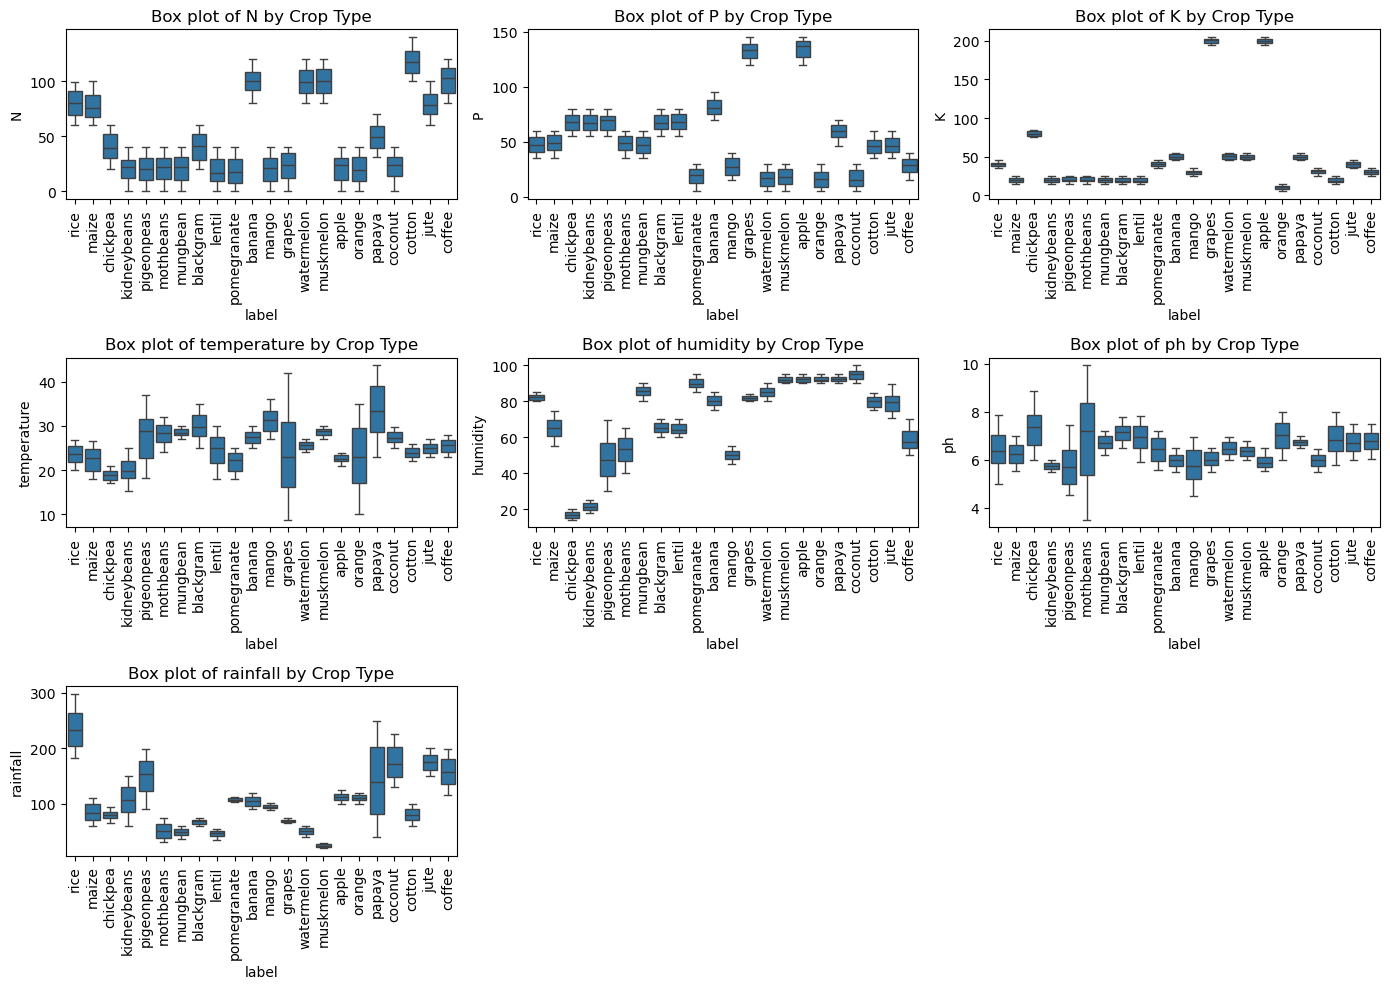

In [24]:
# BOX PLOT

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'Box plot of {feature} by Crop Type')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()